# Naive Bayes

In [51]:
import pandas as pd
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

In [2]:
d2 = pd.read_csv("../data/extracted/d2_v.csv")
test = pd.read_csv("../data/extracted/test_v.csv")

### Dummy features

In [4]:
def dummy_columns(df):
    i=0
    while i < 5000:
        if str(i) not in df.columns:
            df[str(i)] = float(0)
        i+=1
    return df

d2_dummy = dummy_columns(d2)
test_dummy = dummy_columns(test)

/var/folders/jt/pz9l_r592nj1r22ry71tnbr40000gn/T/ipykernel_54368/3312933400.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(i)] = float(0)
/var/folders/jt/pz9l_r592nj1r22ry71tnbr40000gn/T/ipykernel_54368/3312933400.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(i)] = float(0)
/var/folders/jt/pz9l_r592nj1r22ry71tnbr40000gn/T/ipykernel_54368/3312933400.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

### Reorder

In [5]:
def reorder(df):
    i = 0
    new_df=pd.DataFrame()
    while i < 5000:
        new_df[str(i)] = df[str(i)]
        i+=1
    return new_df

d2_X = reorder(d2_dummy)
test_X = reorder(test_dummy)

/var/folders/jt/pz9l_r592nj1r22ry71tnbr40000gn/T/ipykernel_54368/2588380576.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[str(i)] = df[str(i)]
/var/folders/jt/pz9l_r592nj1r22ry71tnbr40000gn/T/ipykernel_54368/2588380576.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[str(i)] = df[str(i)]
/var/folders/jt/pz9l_r592nj1r22ry71tnbr40000gn/T/ipykernel_54368/2588380576.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

### Model

In [9]:
d2_Y = d2['machine_id']

In [12]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(d2_X,d2_Y,test_size=0.2,random_state=0)

In [54]:
params_NB = {'alpha': [0,1,2,3,4,5,6,7,8,9,10]}

In [58]:
nbModel_grid = GridSearchCV(estimator=MultinomialNB(), param_grid=params_NB, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
nbModel_grid.fit(X_train, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


/Users/hannahchin/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/hannahchin/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/hannahchin/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/hannahchin/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.


MultinomialNB(alpha=8)


In [59]:
y_pred = pd.DataFrame(nbModel_grid.predict(X_test),columns = ['predicted'])

In [60]:
y_pred

predicted
0           5
1           5
2           5
3           5
4           5
..        ...
95          5
96          5
97          5
98          5
99          5

[100 rows x 1 columns]

### Evaluation

In [61]:
Y_test.reset_index(drop=True, inplace=True)
results = pd.concat([y_pred, Y_test], axis = 1)
results

predicted  machine_id
0           5           5
1           5           1
2           5           1
3           5           3
4           5           3
..        ...         ...
95          5           2
96          5           5
97          5           3
98          5           5
99          5           1

[100 rows x 2 columns]

In [62]:
y_pred['predicted'].unique()

array([5, 3])

In [42]:
labels = results['machine_id'].values
pred = results['predicted'].values
r = sklearn.metrics.confusion_matrix(labels, pred)
r

array([[ 0,  1,  0,  8, 10],
       [ 1,  0,  0, 10, 10],
       [ 4,  2,  0,  9, 10],
       [ 0,  0,  0,  2, 16],
       [ 0,  0,  0,  1, 16]])

In [43]:
sklearn.metrics.accuracy_score(labels, pred)

0.18

<Axes: >

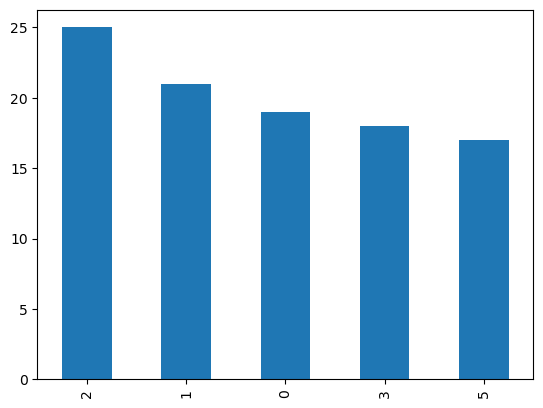

In [44]:
results['machine_id'].value_counts().plot(kind = 'bar')

<Axes: >

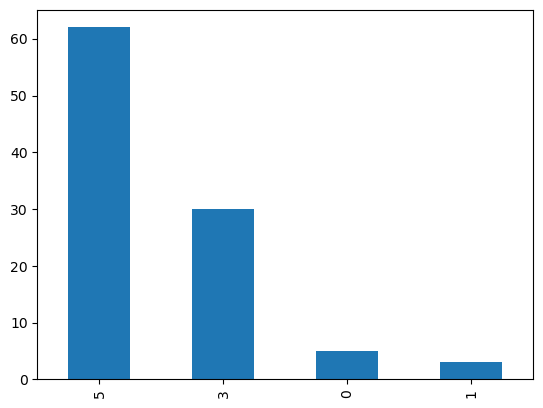

In [45]:
results['predicted'].value_counts().plot(kind = 'bar')

<Axes: >

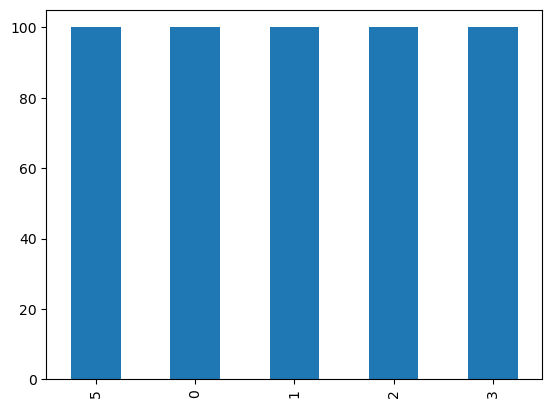

In [46]:
d2['machine_id'].value_counts().plot(kind = 'bar')